In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import minimum_filter
from scipy.ndimage import maximum_filter

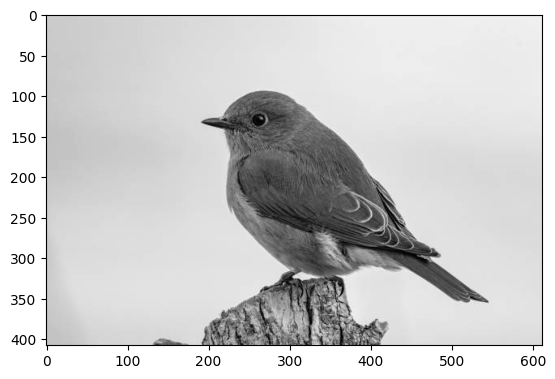

In [13]:
# Load grayscale image
image = cv2.imread("bird.jpg", cv2.IMREAD_GRAYSCALE) 
plt.imshow(image, cmap="gray")
plt.show() 

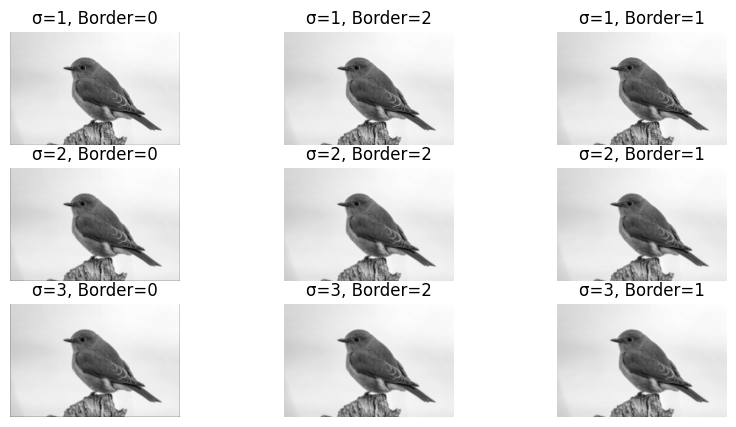

In [14]:
# Apply Gaussian filter with different sigma values and border types
sigma_values = [1, 2, 3]
border_types = [cv2.BORDER_CONSTANT, cv2.BORDER_REFLECT, cv2.BORDER_REPLICATE]

plt.figure(figsize=(10, 5))

for i, sigma in enumerate(sigma_values):
    for j, border in enumerate(border_types):
        blurred = cv2.GaussianBlur(image, (5, 5), sigma, borderType=border)
        plt.subplot(len(sigma_values), len(border_types), i * len(border_types) + j + 1)
        plt.imshow(blurred, cmap="gray")
        plt.title(f"σ={sigma}, Border={border}")
        plt.axis("off")

plt.show() 

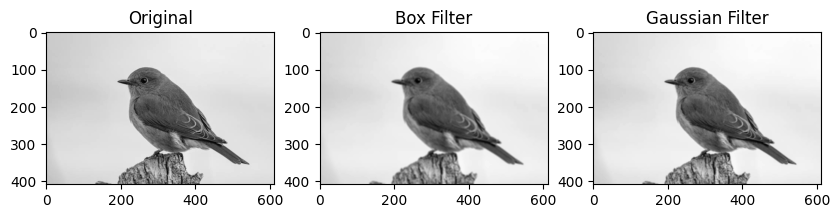

In [15]:
# Apply mean (box) filter
box_filtered = cv2.blur(image, (5, 5))

# Apply Gaussian filter
gaussian_filtered = cv2.GaussianBlur(image, (5, 5), 1)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(image, cmap="gray"), plt.title("Original")
plt.subplot(1, 3, 2), plt.imshow(box_filtered, cmap="gray"), plt.title("Box Filter")
plt.subplot(1, 3, 3), plt.imshow(gaussian_filtered, cmap="gray"), plt.title("Gaussian Filter")
plt.show() 


# A box filter (mean filter) assigns equal weights to all pixels in a kernel, 
# whereas a Gaussian filter gives more importance to the center pixels.

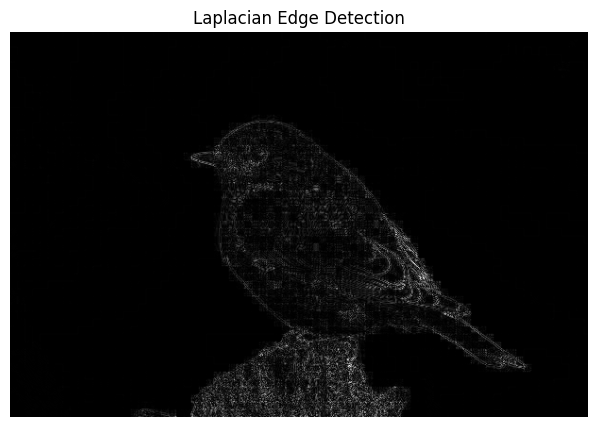

In [20]:
# Apply Laplacian filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display results
plt.figure(figsize=(10, 5))
plt.imshow(np.abs(laplacian), cmap="gray")
plt.title("Laplacian Edge Detection")
plt.axis("off")
plt.show() 

#The Laplacian filter detects edges by highlighting regions of rapid intensity change.

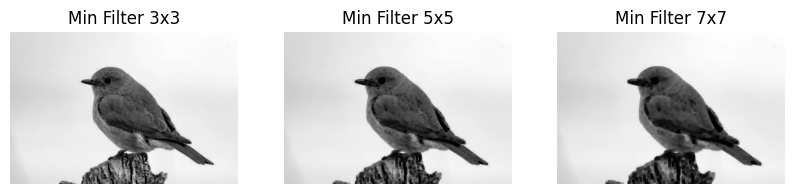

In [25]:
# Apply minimum filter with different kernel sizes
kernel_sizes = [3, 5, 7]
plt.figure(figsize=(10, 20))
for i, k in enumerate(kernel_sizes):
    min_filtered = minimum_filter(image, size=k)
    plt.subplot(1, len(kernel_sizes), i+1)
    plt.imshow(min_filtered, cmap="gray")
    plt.title(f"Min Filter {k}x{k}")
    plt.axis("off")

plt.show() 

# The minimum filter replaces each pixel with the minimum value in its neighborhood, 
# effectively removing salt noise.

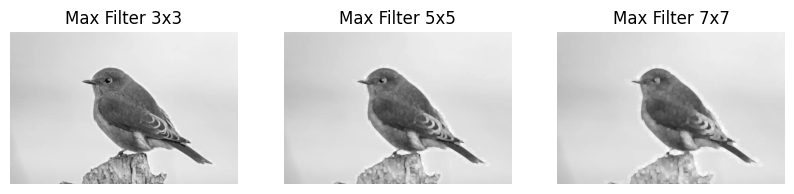

In [28]:
# Apply maximum filter with different kernel sizes
plt.figure(figsize=(10, 5))

for i, k in enumerate(kernel_sizes):
    max_filtered = maximum_filter(image, size=k)
    plt.subplot(1, len(kernel_sizes), i+1)
    plt.imshow(max_filtered, cmap="gray")
    plt.title(f"Max Filter {k}x{k}")
    plt.axis("off")

plt.show()

#The maximum filter replaces each pixel with the maximum value in its neighborhood, 
#effectively removing pepper noise.

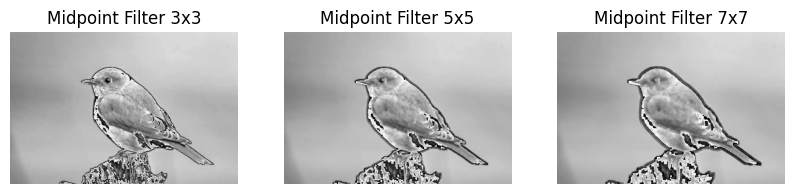

In [29]:
def midpoint_filter(img, ksize):
    min_filtered = minimum_filter(img, size=ksize)
    max_filtered = maximum_filter(img, size=ksize)
    return (min_filtered + max_filtered) // 2

# Apply midpoint filter
plt.figure(figsize=(10, 5))

for i, k in enumerate(kernel_sizes):
    midpoint_filtered = midpoint_filter(image, k)
    plt.subplot(1, len(kernel_sizes), i+1)
    plt.imshow(midpoint_filtered, cmap="gray")
    plt.title(f"Midpoint Filter {k}x{k}")
    plt.axis("off")

plt.show() 